In [1]:
import yfinance as yf
import os
import pyfolio as pf
os.chdir('C:/Users/10265729/Desktop/Pratik/Data Science Bootcamp/Project 1')
from datetime import datetime

import matplotlib.pyplot as plt
import warnings

c:\Users\10265729\Anaconda3\envs\quant\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
def download_data(stock, start, end):
    data = yf.download(stock, start, end)
    return data

In [3]:
stocks = ['SPY', 'QQQ','GLD', 'TIP', 'VWO']
data = download_data(stocks, '2000-1-1', '2023-1-30')
data.to_csv('Mul.csv')

# stock_df = pd.DataFrame({
#     "Stock": ["GLD", "QQQ", "SPY", "TIP", "VWO"],
#     "EstDate": [2004, 1999, 1993, 2003, 2005],
#     "StockLab"["Gold Trust","Tech","Tech","Bonds","Emerging Markets"]
# })
# stock_df

[*********************100%***********************]  5 of 5 completed


In [10]:
data.dropna()
p_spy = data['Pct_Change_SPY'] = data['Close']['SPY'].pct_change()
spy_std = data['STDEV_SPY'] = data['Pct_Change_SPY'].rolling(window=2).std()
p_qqq = data['Pct_Change_QQQ'] = data['Close']['QQQ'].pct_change()
qqq_std = data['STDEV_QQQ'] = data['Pct_Change_QQQ'].rolling(window=2).std()
p_gld = data['Pct_Change_GLD'] = data['Close']['GLD'].pct_change()
p_tip = data['Pct_Change_TIP'] = data['Close']['TIP'].pct_change()
p_vwo = data['Pct_Change_VWO'] = data['Close']['VWO'].pct_change()
data

Adj Close                                                 \
                   GLD         QQQ         SPY         TIP        VWO   
Date                                                                    
2000-01-03         NaN   81.471092   95.308769         NaN        NaN   
2000-01-04         NaN   75.882072   91.581657         NaN        NaN   
2000-01-05         NaN   73.947357   91.745483         NaN        NaN   
2000-01-06         NaN   68.868896   90.270973         NaN        NaN   
2000-01-07         NaN   77.386818   95.513618         NaN        NaN   
...                ...         ...         ...         ...        ...   
2023-01-23  179.630005  288.959991  400.630005  108.550003  42.799999   
2023-01-24  180.279999  288.369995  400.200012  109.169998  42.840000   
2023-01-25  181.110001  287.730011  400.350006  109.389999  42.849998   
2023-01-26  179.470001  293.339996  404.750000  109.379997  43.180000   
2023-01-27  179.220001  296.260010  405.679993  109.139999  42.889999   

                 Close                                                 ...  \
                   GLD         QQQ         SPY         TIP        VWO  ...   
Date                                                                   ...   
2000-01-03         NaN   94.750000  145.437500         NaN        NaN  ...   
2000-01-04         NaN   88.250000  139.750000         NaN        NaN  ...   
2000-01-05         NaN   86.000000  140.000000         NaN        NaN  ...   
2000-01-06         NaN   80.093750  137.750000         NaN        NaN  ...   
2000-01-07         NaN   90.000000  145.750000         NaN        NaN  ...   
...                ...         ...         ...         ...        ...  ...   
2023-01-23  179.630005  288.959991  400.630005  108.550003  42.799999  ...   
2023-01-24  180.279999  288.369995  400.200012  109.169998  42.840000  ...   
2023-01-25  181.110001  287.730011  400.350006  109.389999  42.849998  ...   
2023-01-26  179.470001  293.339996  404.750000  109.379997  43.180000  ...   
2023-01-27  179.220001  296.260010  405.679993  109.139999  42.889999  ...   

              Volume                        Pct_Change_SPY STDEV_SPY  \
                 SPY        TIP         VWO                            
Date                                                                   
2000-01-03   8164300        NaN         NaN            NaN       NaN   
2000-01-04   8089800        NaN         NaN      -0.039106       NaN   
2000-01-05  12177900        NaN         NaN       0.001789  0.028917   
2000-01-06   6227200        NaN         NaN      -0.016071  0.012629   
2000-01-07   8066500        NaN         NaN       0.058076  0.052430   
...              ...        ...         ...            ...       ...   
2023-01-23  84178800  3170400.0  13000000.0       0.011999  0.004688   
2023-01-24  59524900  2913900.0  13591800.0      -0.001073  0.009243   
2023-01-25  84800300  2996900.0   8435800.0       0.000375  0.001024   
2023-01-26  72287400  4193500.0  10829900.0       0.010990  0.007506   
2023-01-27  68280700  2408700.0  11908200.0       0.002298  0.006147   

           Pct_Change_QQQ STDEV_QQQ Pct_Change_GLD Pct_Change_TIP  \
                                                                    
Date                                                                
2000-01-03            NaN       NaN            NaN            NaN   
2000-01-04      -0.068602       NaN            NaN            NaN   
2000-01-05      -0.025496  0.030480            NaN            NaN   
2000-01-06      -0.068677  0.030534            NaN            NaN   
2000-01-07       0.123683  0.136019            NaN            NaN   
...                   ...       ...            ...            ...   
2023-01-23       0.022216  0.003642       0.001896      -0.000920   
2023-01-24      -0.002042  0.017153       0.003619       0.005712   
2023-01-25      -0.002219  0.000126       0.004604       0.002015   
2023-01-26       0.019497  0.015356      -0.009055      -0.0

In [11]:
spy = (data['Pct_Change_SPY']+1).cumprod()
qqq = (data['Pct_Change_QQQ']+1).cumprod()
gld = (data['Pct_Change_GLD']+1).cumprod()
tip = (data['Pct_Change_TIP']+1).cumprod()
vwo = (data['Pct_Change_VWO']+1).cumprod()



In [12]:
print(f'SPY {spy * 100}')
print(f'QQQ {qqq*100}')
print(f'GLD {gld*100}')
print(f'TIP {tip*100}')
print(F'VWO {vwo*100}')



SPY Date
2000-01-03           NaN
2000-01-04     96.089385
2000-01-05     96.261281
2000-01-06     94.714224
2000-01-07    100.214869
                 ...    
2023-01-23    275.465409
2023-01-24    275.169755
2023-01-25    275.272888
2023-01-26    278.298238
2023-01-27    278.937683
Name: Pct_Change_SPY, Length: 5805, dtype: float64
QQQ Date
2000-01-03           NaN
2000-01-04     93.139842
2000-01-05     90.765172
2000-01-06     84.531662
2000-01-07     94.986807
                 ...    
2023-01-23    304.970967
2023-01-24    304.348280
2023-01-25    303.672835
2023-01-26    309.593664
2023-01-27    312.675472
Name: Pct_Change_QQQ, Length: 5805, dtype: float64
GLD Date
2000-01-03           NaN
2000-01-04           NaN
2000-01-05           NaN
2000-01-06           NaN
2000-01-07           NaN
                 ...    
2023-01-23    404.754395
2023-01-24    406.219005
2023-01-25    408.089221
2023-01-26    404.393864
2023-01-27    403.830547
Name: Pct_Change_GLD, Length: 5805, dtype: flo

Completed Analysis Uploaded to GitHub (20 points) 
- Merge all the files by date to compare and contrast all major ETF's and analyze there returns by using Entry and Exit rules for Moving Average or simpely buying and sitting on it for 20 years
- Return(Simple Retruns, Daily - Current day / Prev day)
- Standard dev on return - Can tell us volatility
- All Stat analysis on returns (using pyflio library)

** Which of the 5 ETF's is most volatile and returns (graph)
** Best overall retruns
** 


Final data analysis contains ample and complete information in README file (10 points)
- Gather our findings 

Final repository is acceptable for professional quality presentation (10 points)
- In notebook
Visualizations (20 points)
6–8 visualizations of data (at least two per question) (10 points)
 - Use PyFolio library (tear sheet - This library alone will get us 10 plus visulazation)
 - Retruns charts
 - STDEV charts
 - Regression charts


Clear and accurate labeling of images (5 points)
Visualizations supported with ample and precise explanation (5 points)
Analysis and Conclusion (20 points)
- Which ever etf provides best returns with lowest risk will get most amount of allocation from portfolio

Write-up summarizes major findings and implications at a professional level (5 points)
Each question in the project proposal is answered with precise descriptions and findings (5 points)
Findings are strongly supported with numbers and visualizations (5 points)
Each question response is supported with a well-discerned statistical analysis from lessons (e.g., aggregation, correlation, comparison, summary statistics, sentiment analysis, and time series analysis) (5 points)
Group Presentation (20 points)
All group members spoke during the presentation (5 points)
Group was well prepared (5 points)
Presentation is relevant to material (5 points)
Presentation maintains audience interest (5 points)
Slide Deck (20 points)
Slides are visually clean and professional (5 points)
Slides are relevant to material (5 points)
Slides effectively demonstrate the project (5 points)
Slides are clear and maintain audience interest (5 points)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


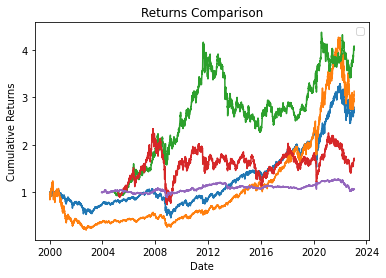

In [13]:

plt.plot(spy)
plt.plot(qqq)
plt.plot(gld)
plt.plot(vwo)
plt.plot(tip)

plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.title('Returns Comparison')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


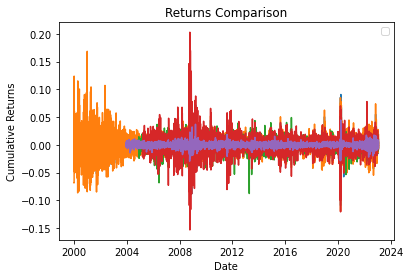

In [14]:
plt.plot(p_spy)
plt.plot(p_qqq)
plt.plot(p_gld)
plt.plot(p_vwo)
plt.plot(p_tip)

plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.title('Returns Comparison')
plt.legend()
plt.show()
# plt.plot(qqq_std)

In [15]:
pf.create_full_tear_sheet(data['strategy_returns'])

KeyError: 'strategy_returns'

In [83]:
spy_std

Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05    0.028917
2000-01-06    0.012629
2000-01-07    0.052430
                ...   
2023-01-23    0.004688
2023-01-24    0.009243
2023-01-25    0.001024
2023-01-26    0.007506
2023-01-27    0.006147
Name: Pct_Change_SPY, Length: 5805, dtype: float64